# Bike Rental Ridership Prediction for Bike-sharing Systems Using Machine Learning

## Introduction

Nowadays, a bicycle-sharing system, a service in which a rider can rent a bicycle available for shared use on a short-term basis. The system plays an essential role in alleviating traffic congestion and noise in cities. In addition, the use of shared bicycles reduces air pollution as opposed to motorized vehicles in large cities. 

For a bicycle-sharing program, the riders number greatly varies on any given day and hour. Developing an algorithm that accurately predicts the number of hourly riders can immensely help the program or the business owners by providing a more efficient management and cost-effective way. In this project, I applied different Machine Learning techniques to develop models that accurately predict the number of riders in any given hour of a day. 

Original data source [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)


## Importing Modules
Here, I import some important python modules for further data processing. 

  - NumPy for calculating N-dimensional array 
  - pandas for data analysis
  - Matplotlib and seaborn to visualize the dataset

In [1]:
#Import important modules
#set %matplotlibinline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 500

## Loading the Dataset


In [2]:
#Loading the dataset is in the form of a CSV file 
bike_data = pd.read_csv("C:/Users/kassa/OneDrive/Documents/Portfolio Idea/Bike selected/Bike-Sharing-Dataset/hour.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Describing the data

Date – the 365 days of the year
Seasons – the season of the year
Year - one of the year(2011-2012)
Month - Month of the year
Hour – The hour of the day
Holiday – If it is a holiday
Weekday - Day of the week
Working day - if a day is neither weekend nor holiday
Weather
  1: Clear, Few clouds, Partly cloudy, Partly cloudy         
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist         
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds         
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Temperature (c) – Temperature of the day
Humidity – Humidity in the air
Wind speed – Speed of wind
Casual - Number of rented bikes without registration
Registered - Number of rented bikes with registration
Count - Sum of number of rented bikes (Casual plus registered)
 


To extract information from the dataset, I use some functions:

- describe() method - calculate different calculations for each data point in the features. 

- Info () method - help us count non-null values and null values in each field and see the data type of features present in the data.

- unique() method - used to check unique values for each features 

- isnull() method - help us to check null values present in each feature. 

In [3]:
# Check statistical info
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Check data type info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Check unique values
bike_data.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# check for null values
bike_data.isnull().sum() #Notice that there are no null values in the dataset.

## Preprocessing the dataset

In [4]:
# As some of the columns name are not clear, let re-name them

bike_data=bike_data.rename(columns ={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'} )
bike_data.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#Here fields that not .... 
bike_data=bike_data.drop(columns=['instant', 'dteday', 'year'])

In [6]:
#Here some categorical variables- season,month,hour,holiday,weekday,workingday and weather to be included in ML model they have to be binary dummy variables. 
#Let's convert them using Pandas - get_dummies().

cols_list = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols_list:
    bike_data[col] = bike_data[col].astype("category")

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) refers to performing initial investigations on the dataset to understand the data and gather as many insights. EDA involves discovering patterns and spotting anomalies using summary statistics and visualizations.

Below, using matlibplot and seaborn library, I explore visually how the bike usage (count) correlated with available features by creating different plots.


[Text(0.5, 1.0, 'Number of bike riders during weekdays and weekends')]

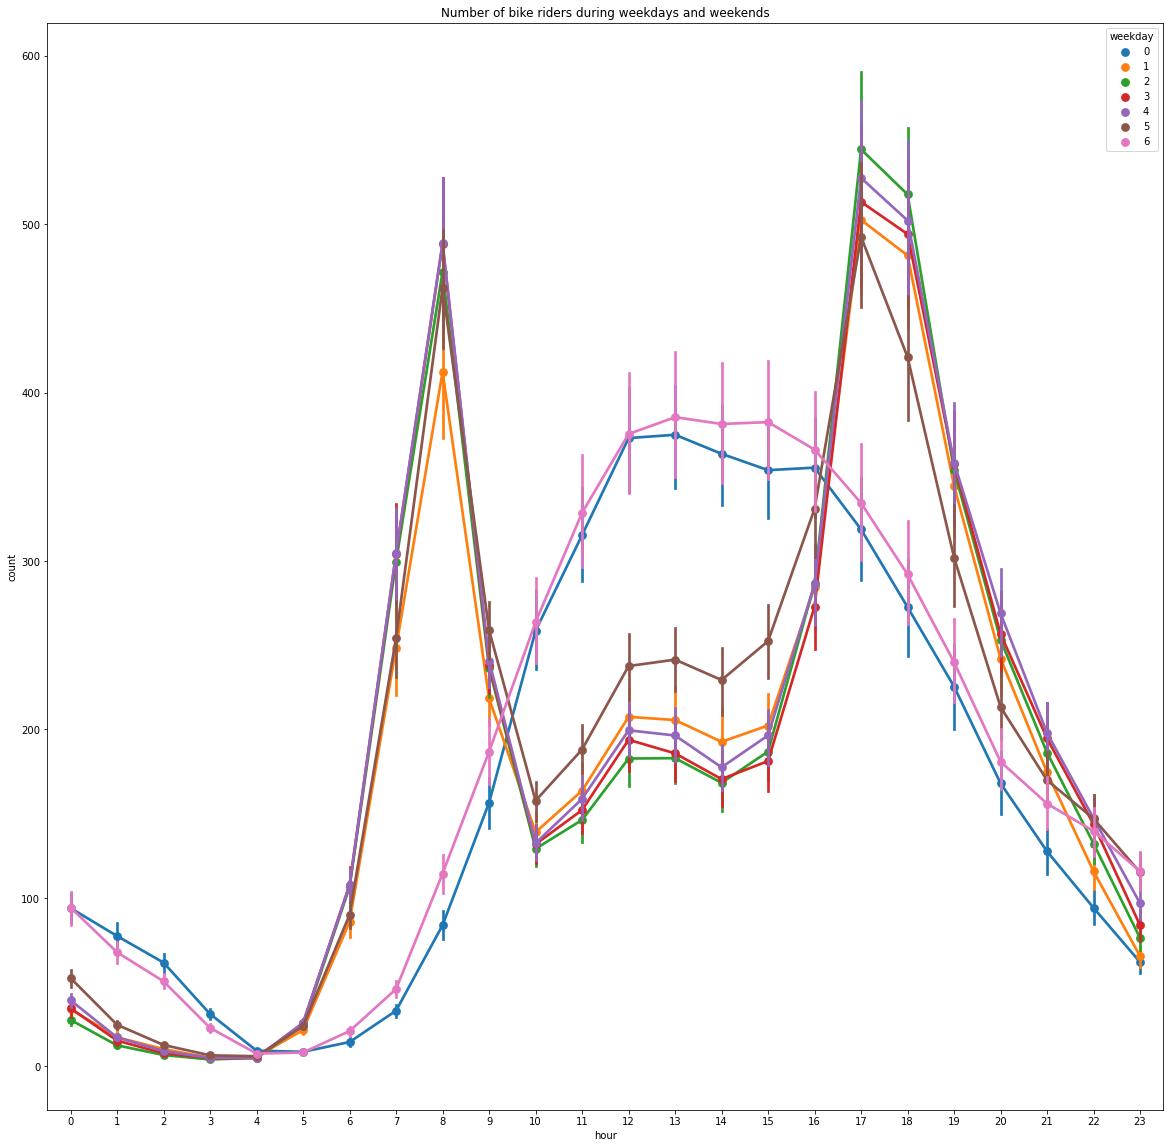

In [10]:
#Use seaborn to create a countplot to see count of bikes on weekdays and weekends

fig, ax = plt.subplots(figsize=(20,20))

sns.pointplot(data=bike_data, x="hour", y="count", hue="weekday", ax=ax)
ax.set(title="Number of bike rides during weekdays and weekends")

[Text(0.5, 1.0, 'Number of bike riders during different weathers')]

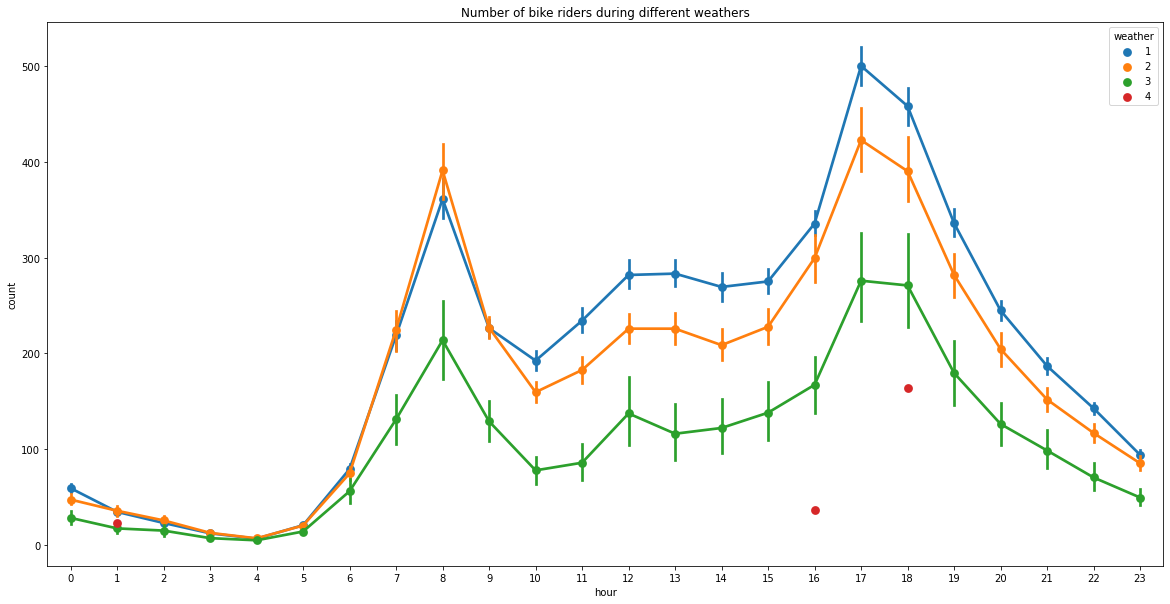

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_data, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Number of bike rides during weekdays and weekends')

[Text(0.5, 1.0, 'Number of bike riders during different months')]

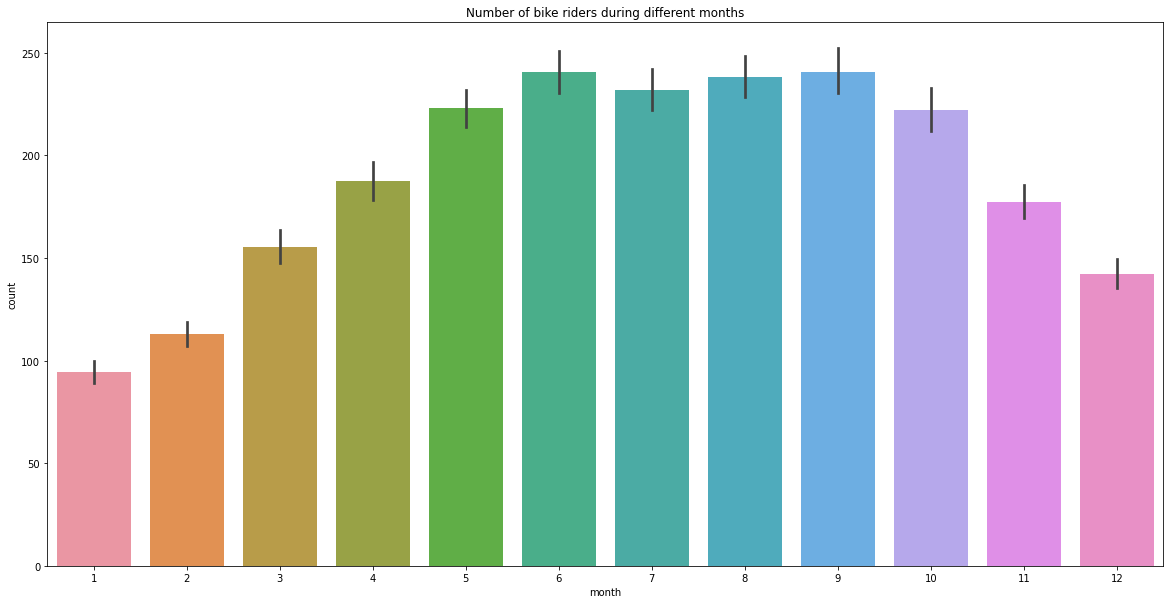

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike_data, x='month', y='count', ax=ax)
ax.set(title='Number of bike rides during weekdays and weekends')

[Text(0.5, 1.0, 'Number of bike riders during different days')]

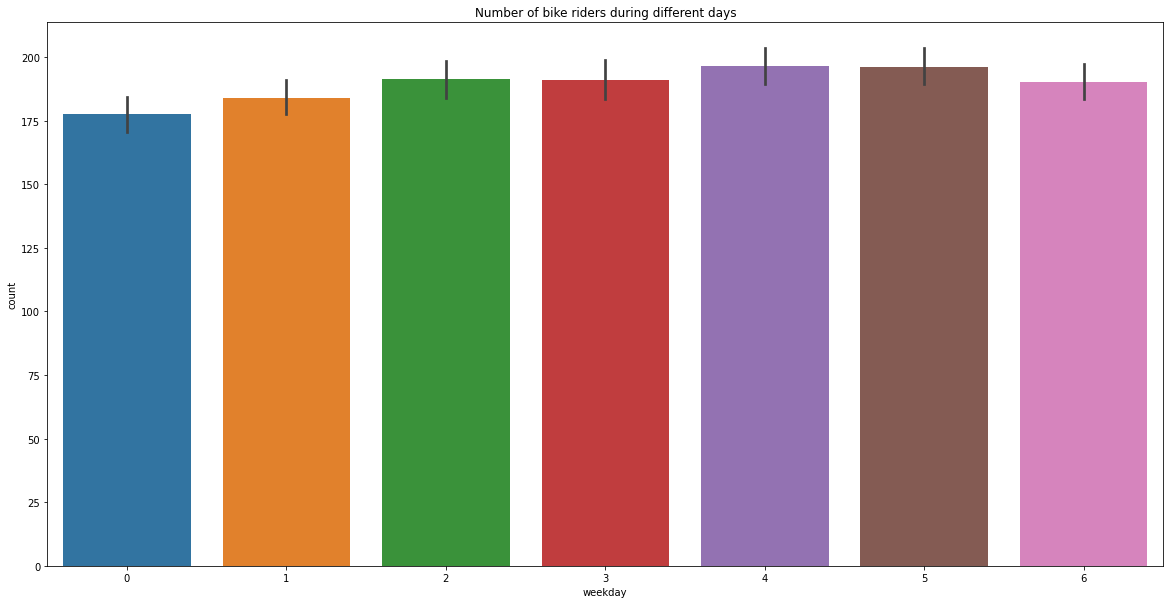

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike_data, x='weekday', y='count', ax=ax)
ax.set(title='Number of bike rides during weekdays and weekends')

### Correlation Matrix

The correlation matrix shows the correlation coefficient between variables.

Below, the correlation between variables is visualized using a heatmap.

<AxesSubplot:>

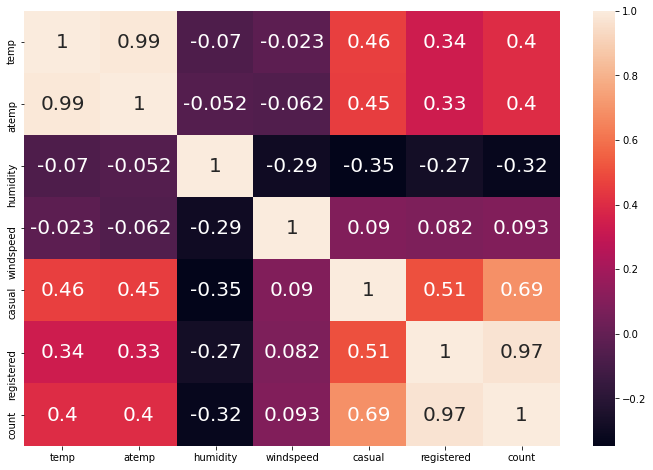

In [11]:
cor= bike_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, annot_kws={"size":20})

### One hot Encoding

The majority of machine learning algorithms require categorical features to be numeric in value as the feature values need to be multiplied by the model weights.  

One hot encoding - is one way of converting categorical data to numeric values. With one-hot, each categorical feature is converted into a new categorical column and represented by a binary value of 1 or 0 to those columns. 



In [15]:
final_bike_data = bike_data

def one_hot_encoding(data, my_column):
    data = pd.concat([data, pd.get_dummies(data[my_column], prefix=my_column, drop_first=True)], axis=1)
    data = data.drop([my_column], axis=1)
    return data

cols_list = ['weekday','month','hour','holiday','season','workingday','weather']

for col in cols_list:
    final_bike_data = one_hot_encoding(final_bike_data, col)
final_bike_data.head()

,temp,atemp,humidity,windspeed,casual,registered,count,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,season_2,season_3,season_4,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Building Model

### Splitting Dependent and Independent Features

In the dataset, 'count' is the dependent feature. 'count' feature is the sum of the number of rented bikes (Casual plus registered). Hence the    'casual' and 'registered' features are similarly dependent and should be dropped to avoid leakage.

In [ ]:
X = final_bike_data.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = final_bike_data['count']

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [57]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [58]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.6312172911691329
Model: Ridge()
CV score: 0.6304079414191445
Model: HuberRegressor()
CV score: 0.6603308591127108
Model: ElasticNetCV()
CV score: 0.6252222784219456
Model: DecisionTreeRegressor()
CV score: 0.6098835945814828
Model: RandomForestRegressor()
CV score: 0.3894402815784931
Model: ExtraTreesRegressor()
CV score: 0.4028829566274415
Model: GradientBoostingRegressor()
CV score: 0.47143003710611764


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

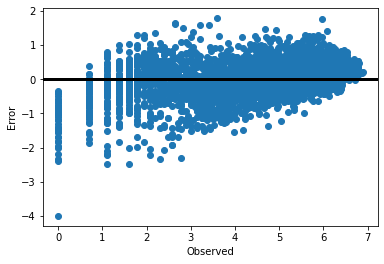

In [62]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))